# Análise Exploratória dos Dados (EDA)

In [2]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importar dataframe de treino e de teste
data_treino = pd.read_csv('titanic/train.csv')
data_teste = pd.read_csv('titanic/test.csv')

In [4]:
#Traduzir colunas
data_treino.columns = ['IdPassageiro', 'Sobreviveu',
                       'Classe', 'Nome', 'Sexo', 'Idade',
                       'IrmaosConjuge','PaisFilhos', 'Bilhete',
                       'Tarifa', 'Cabine', 'Embarque']

In [5]:
data_teste.columns = ['IdPassageiro', 'Classe', 'Nome',
                      'Sexo', 'Idade','IrmaosConjuge',
                      'PaisFilhos', 'Bilhete', 'Tarifa',
                      'Cabine', 'Embarque']

In [6]:
#Definir o IdPassageiro como índice
data_treino.set_index('IdPassageiro', inplace=True)
data_teste.set_index('IdPassageiro', inplace=True)

In [7]:
data_treino.shape, data_teste.shape

((891, 11), (418, 10))

In [8]:
#Concatenar dataframes
data = pd.concat([data_treino, data_teste],sort=True)

In [9]:
data['Sexo'] = data['Sexo'].map({'male': 'homem',
                                 'female': 'mulher'})

In [10]:
data.head()

,Bilhete,Cabine,Classe,Embarque,Idade,IrmaosConjuge,Nome,PaisFilhos,Sexo,Sobreviveu,Tarifa
IdPassageiro,,,,,,,,,,,
1,A/5 21171,NaN,3,S,22.0,1,"Braund, Mr. Owen Harris",0,homem,0.0,7.2500
2,PC 17599,C85,1,C,38.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,mulher,1.0,71.2833
3,STON/O2. 3101282,NaN,3,S,26.0,0,"Heikkinen, Miss. Laina",0,mulher,1.0,7.9250
4,113803,C123,1,S,35.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,mulher,1.0,53.1000
5,373450,NaN,3,S,35.0,0,"Allen, Mr. William Henry",0,homem,0.0,8.0500


## Resumo da Análise Exploratória
### Parâmetros Categóricos
* Nominais
 * Sexo
 * Embarque
 * Sobreviveu
 
* Ordinais
 * Classe
 

### Parâmetros Númericos
* Contínuos
 * Idade
 * Tarifa
 
* Discretos
 * IrmaosConjuge
 * PaisFilhos
 
### Parâmetros Alfanuméricos
* Bilhete

# Engenharia de Recursos

In [11]:
data.isnull().sum()

Bilhete             0
Cabine           1014
Classe              0
Embarque            2
Idade             263
IrmaosConjuge       0
Nome                0
PaisFilhos          0
Sexo                0
Sobreviveu        418
Tarifa              1
dtype: int64

In [12]:
#Preencher dados faltando na coluna Embarque com a moda
moda_embarque = data['Embarque'].mode()[0]
data['Embarque'].fillna(moda_embarque, inplace=True)

#Preencher Tarifa faltando com a média
media_tarifa = data['Tarifa'].mean()
data['Tarifa'].fillna(media_tarifa, inplace=True)

In [13]:
#Remover coluna Cabine
data.drop('Cabine', axis=1, inplace=True)

In [14]:
#Informações gerais(Dados Numéricos)
data.describe()

,Classe,Idade,IrmaosConjuge,PaisFilhos,Sobreviveu,Tarifa
count,1309.000000,1046.000000,1309.000000,1309.000000,891.000000,1309.000000
mean,2.294882,29.881138,0.498854,0.385027,0.383838,33.295479
std,0.837836,14.413493,1.041658,0.865560,0.486592,51.738879
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,1.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,1.000000,512.329200


In [15]:
#Informações gerais(Dados Categóricos)
data.describe(include=['O'])

,Bilhete,Embarque,Nome,Sexo
count,1309,1309,1309,1309
unique,929,3,1307,2
top,CA. 2343,S,"Connolly, Miss. Kate",homem
freq,11,916,2,843


In [16]:
data_treino['Sobreviveu'].value_counts()[1]

342

In [17]:
print('Tamanho da população: 2224')
print('Tamanho da amostra: ',
      len(data))
print('Proporção total da amostra em relação à população: ',
      len(data_treino)/2224)
print('Proporção de Sobreviventes(População): ',
      1-1502/2224)
print('Proporção de Sobreviventes(Amostra): ',
     data_treino['Sobreviveu'].value_counts()[1]/len(data_treino))

Tamanho da população: 2224
Tamanho da amostra:  1309
Proporção total da amostra em relação à população:  0.4006294964028777
Proporção de Sobreviventes(População):  0.32464028776978415
Proporção de Sobreviventes(Amostra):  0.3838383838383838


In [18]:
#Obter taxa de sobrevivência por classe
data[['Classe', 'Sobreviveu']].groupby(['Classe']).mean().sort_values(
    by='Sobreviveu', ascending=False)

,Sobreviveu
Classe,
1,0.629630
2,0.472826
3,0.242363


In [19]:
#Obter taxa de sobrevivência por Sexo
data[['Sexo', 'Sobreviveu']].groupby(['Sexo']).mean().sort_values(
    by='Sobreviveu', ascending=False)

,Sobreviveu
Sexo,
mulher,0.742038
homem,0.188908


In [20]:
#Agrupar homens por sobrevivência
data.loc[data['Sexo']=='homem'].groupby('Sobreviveu').mean()

,Classe,Idade,IrmaosConjuge,PaisFilhos,Tarifa
Sobreviveu,,,,,
0.0,2.476496,31.618056,0.440171,0.207265,21.960993
1.0,2.018349,27.276022,0.385321,0.357798,40.821484


In [21]:
#Obter taxa de sobrevivência por IrmaosConjuge
data[['IrmaosConjuge', 'Sobreviveu']].groupby(['IrmaosConjuge']).mean()\
    .sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
IrmaosConjuge,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [22]:
#Obter taxa de sobrevivência por PaisFilhos
data[['PaisFilhos', 'Sobreviveu']].groupby(['PaisFilhos']).mean()\
    .sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
PaisFilhos,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000
9,NaN


In [23]:
#Correlação entre PaisFilhos e IrmaosConjuge
data[['PaisFilhos', 'IrmaosConjuge']].corr()

,PaisFilhos,IrmaosConjuge
PaisFilhos,1.000000,0.373587
IrmaosConjuge,0.373587,1.000000


In [24]:
#Agrupar mulheres por sobrevivência
data.loc[data['Sexo']=='mulher'].groupby('Sobreviveu').mean()

,Classe,Idade,IrmaosConjuge,PaisFilhos,Tarifa
Sobreviveu,,,,,
0.0,2.851852,25.046875,1.209877,1.037037,23.024385
1.0,1.918455,28.847716,0.515021,0.515021,51.938573


In [36]:
#Agrupar homens por sobrevivência
data.loc[data['Sexo']=='homem'].groupby('Sobreviveu').mean()

,Classe,Idade,IrmaosConjuge,PaisFilhos,Tarifa
Sobreviveu,,,,,
0.0,2.476496,31.618056,0.440171,0.207265,21.960993
1.0,2.018349,27.276022,0.385321,0.357798,40.821484


## Resumo da Engenharia de Recursos
### Informações Faltando:
* Cabine(1014):
    * Coluna foi removida por conter muitos dados faltando
* Embarque(2):
    * Embarque é uma quantidade irrisória se comparado com a  amostra. Por este motivo foi preenchida com a moda
* Idade(263):
    * Idade será estimada através da regressão linear
* Sobreviveu(418):
    * A sobrevivência do passageiro será estimada através da regressão logistica
* Tarifa(1):
    * A Tarifa será preenchida com a média da tarifa cobrada dos passageiros

### Informações da população x amostra
- Tamanho da população: 2224
- Tamanho da amostra:  1309
- Proporção total da amostra em relação à população:  0.4006294964028777
- Proporção de Sobreviventes(População):  0.32464028776978415
- Proporção de Sobreviventes(Amostra):  0.3838383838383838

### Relações de Sobrevivência
- Passageiros da primeira classe estão mais propensos a sobreviver, seguido da segunda classe e com menores chances de sobrevivência a terceira classe
- Passageiros do sexo femino estão mais propensas a sobreviver.
- Passageiros Irmaos/Conjuge estão mais propensos a sobreviver em um número de até dois.
- Passageiros Pais/Filhos estão mais propensos a sobreviver desde que estejam em número menor que quatro.

[]: Avaliar a utilidade de criar um recursos chamado família, com base nas informações das colunas IrmaosConjuge, PaisFilhos


# Visualização de Dados

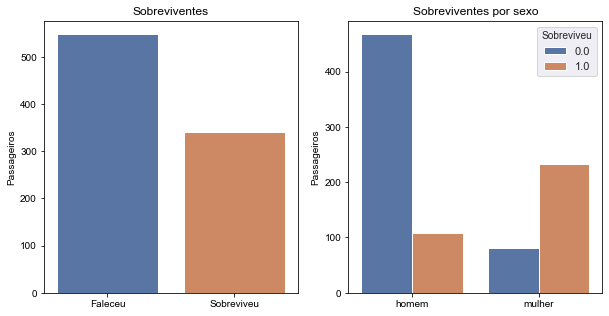

In [25]:
#Contagem de sobreviventes
f, ax = plt.subplots(1,2, figsize=(10,5))


sns.set(style="darkgrid")

#Sobreviventes geral
legenda=['Faleceu', 'Sobreviveu']
sns.countplot('Sobreviveu', data=data, ax=ax[0])
ax[0].set_title('Sobreviventes')
ax[0].set_ylabel('Passageiros')
ax[0].set_xlabel('')
ax[0].set_xticklabels(legenda)

#Sobreviventes por sexo
sns.countplot('Sexo', data=data, hue='Sobreviveu', ax=ax[1])
ax[1].set_title('Sobreviventes por sexo')
ax[1].set_ylabel('Passageiros')
ax[1].set_xlabel('')
plt.show()

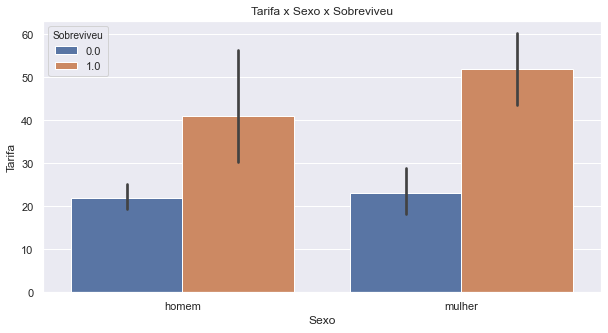

In [26]:
#Graficos de Tarifa
f, ax = plt.subplots(figsize=(10,5))

sns.set(style="darkgrid")

#Tarifa x Sexo x Sobreviveu
legenda=['Faleceu', 'Sobreviveu']
sns.barplot('Sexo', 'Tarifa', hue='Sobreviveu', data=data)
ax.set_title('Tarifa x Sexo x Sobreviveu')
ax.set_ylabel('Tarifa')
ax.set_xlabel('Sexo')
plt.show()

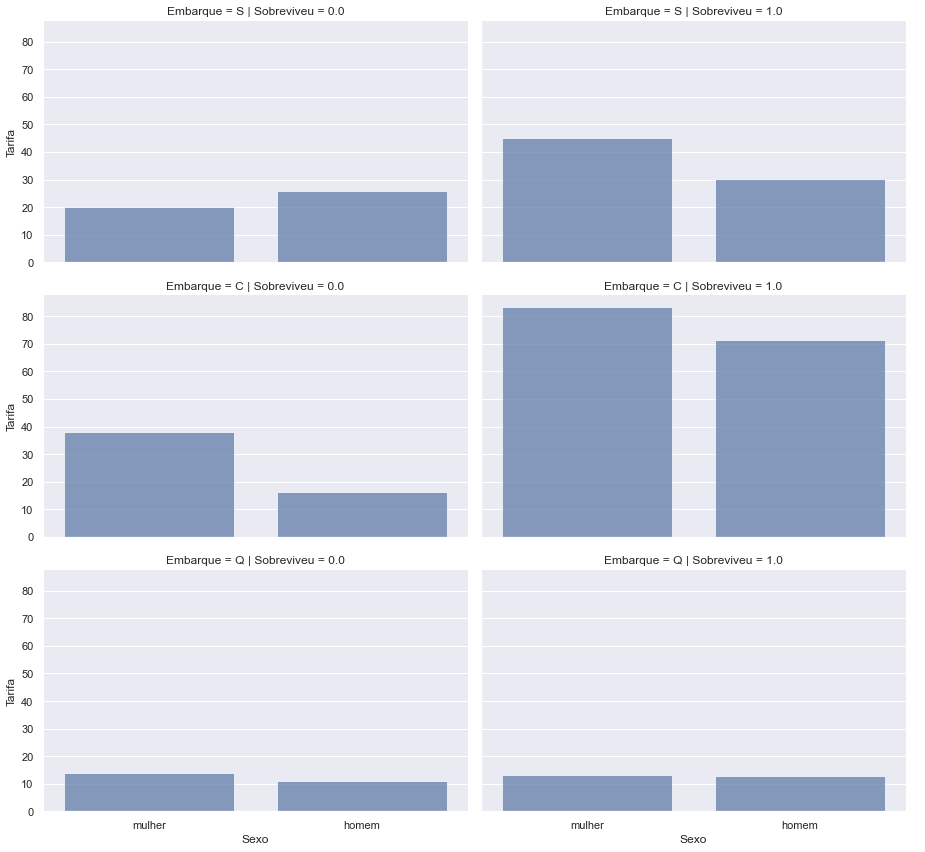

In [27]:
g = sns.FacetGrid(data, row='Embarque', col='Sobreviveu', size=4, aspect=1.6)
sns.set(style="darkgrid")
g.map(sns.barplot, 'Sexo', 'Tarifa', alpha=0.7, ci=None)
g.add_legend()
plt.show()

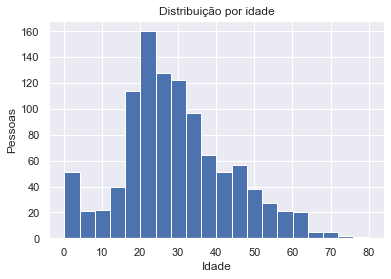

In [28]:
#Distribuição de passageiros por idade
plt.hist(data['Idade'].dropna(), bins=20)
plt.title('Distribuição por idade')
plt.xlabel('Idade')
plt.ylabel('Pessoas')
plt.show()

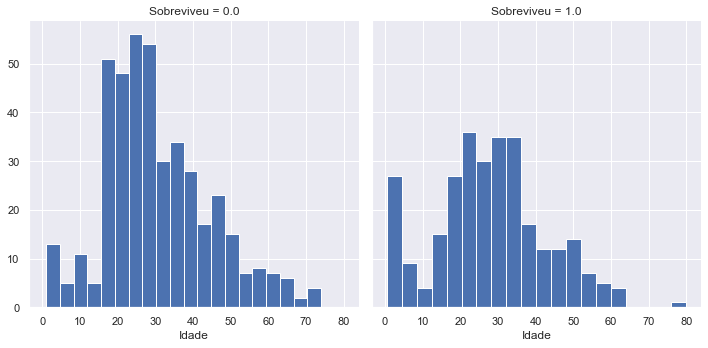

In [29]:
#Distribuição por Idade x Sobreviveu
g = sns.FacetGrid(data, col='Sobreviveu', height=5)
g.map(plt.hist, 'Idade', bins=20)

plt.show()

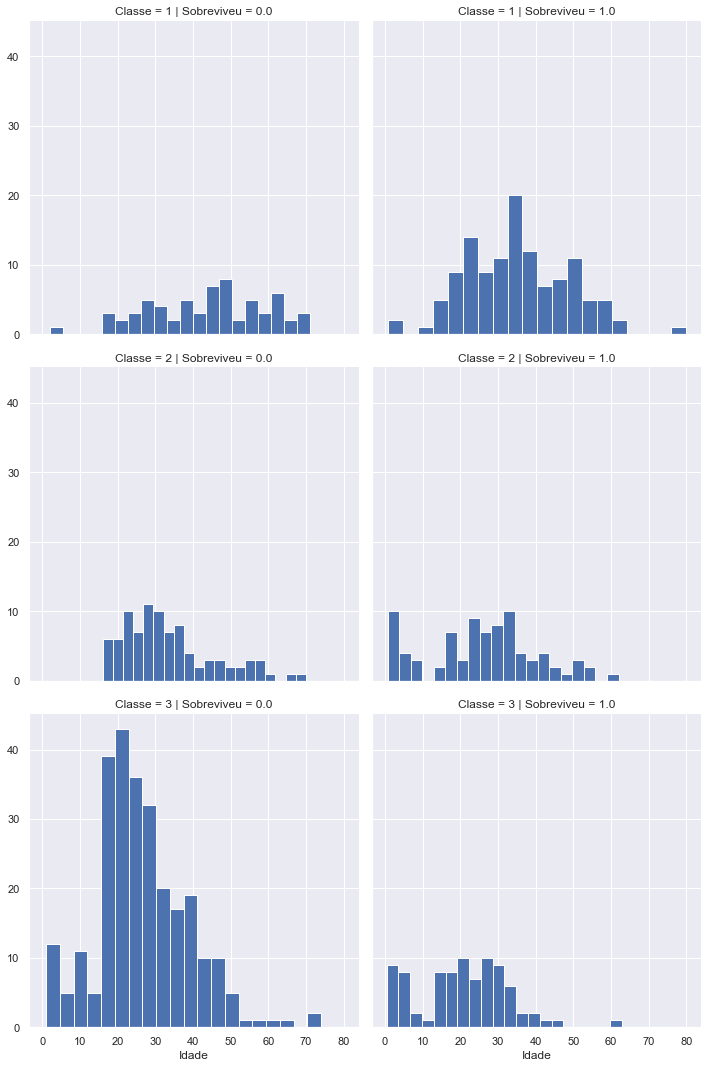

In [30]:
#Distribuição por Idade x Sobreviveu x Classe
g = sns.FacetGrid(data, col='Sobreviveu', row='Classe', height=5)
g.map(plt.hist, 'Idade', bins=20)

plt.show()

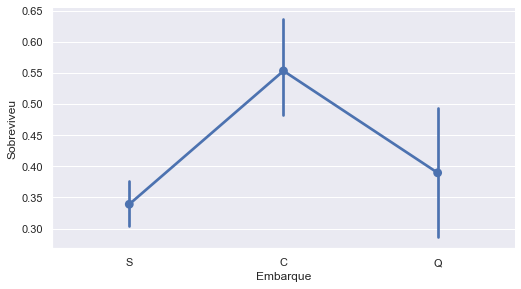

In [31]:
#Chance de sobrevivência por porto de embarque
sns.catplot('Embarque', 'Sobreviveu', data=data, kind='point')
fig=plt.gcf()
fig.set_size_inches(8,4)

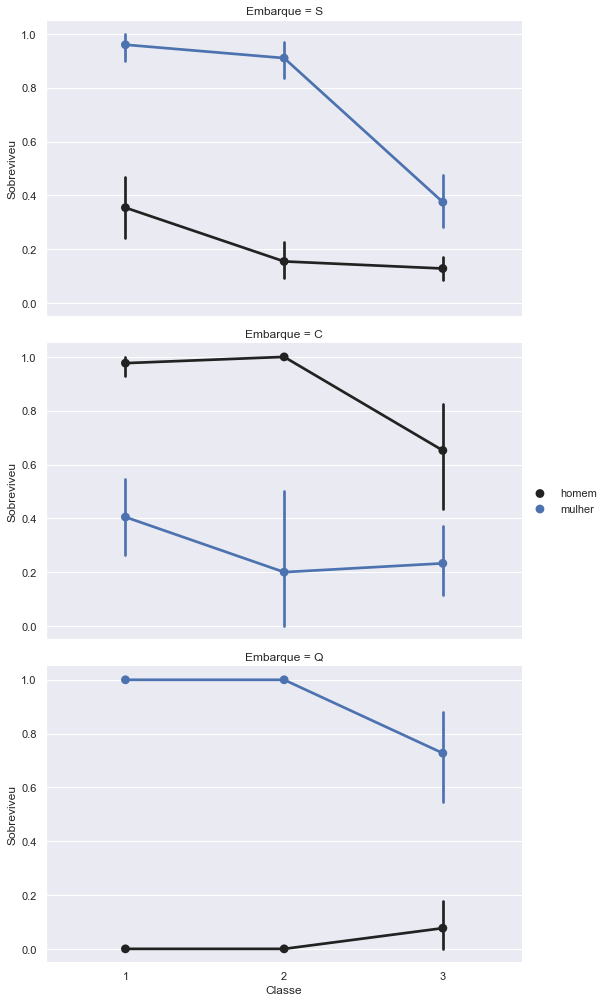

In [32]:
#Embarque x Classe x Sobreviveu
g = sns.FacetGrid(data, row='Embarque',size=4.7, aspect=1.6)
g.map(sns.pointplot, 'Classe', 'Sobreviveu', 'Sexo')
g.add_legend()
plt.show()

## Crosstab de Sobrevivência por classe

In [33]:
pd.crosstab(data['Sobreviveu'],data['Classe'],margins=True)\
.style.background_gradient(cmap='Blues')

Classe,1,2,3,All
Sobreviveu,,,,
0.0,80,97,372,549
1.0,136,87,119,342
All,216,184,491,891


## Dados Faltando

Text(0.5, 1.0, 'HeatMap Dados Faltando')

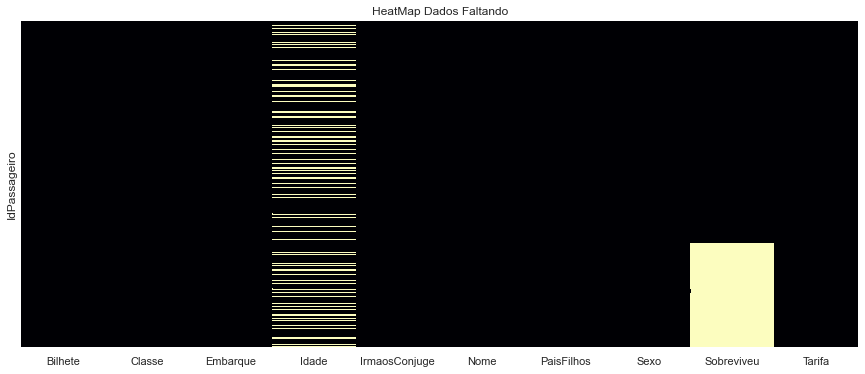

In [34]:
#Graficos de Tarifa
f, ax = plt.subplots(figsize=(15,6))

sns.set(style="darkgrid")
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='magma')
ax.set_title('HeatMap Dados Faltando')

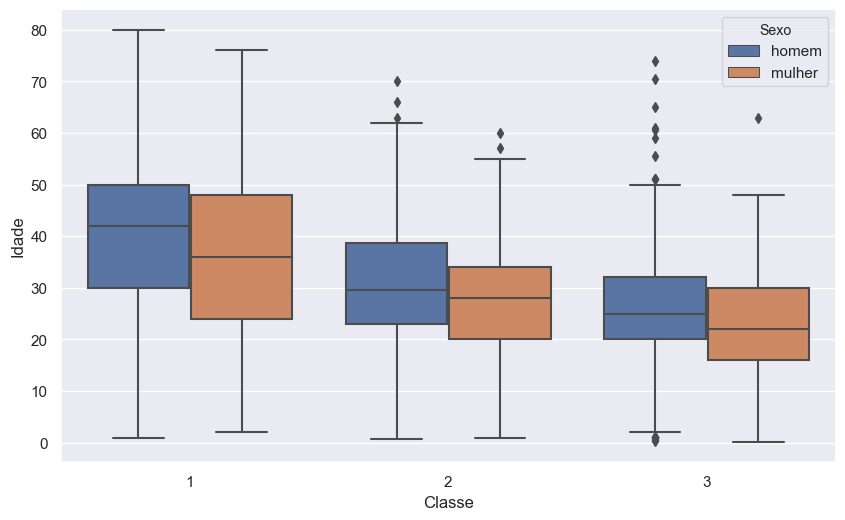

In [35]:
plt.figure(figsize=(10,6), dpi=100)
sns.boxplot(x='Classe', y='Idade', hue='Sexo', data=data)
plt.show()